In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
X=df.iloc[:,:-1].values

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y=df['species'].values

In [10]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [11]:
X.shape,y.shape

((150, 4), (150,))

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [13]:
X_train.shape

(127, 4)

In [14]:
X_test.shape

(23, 4)

In [15]:
scale=StandardScaler()

In [16]:
X_train_scale=scale.fit_transform(X_train)

In [17]:
X_train_scale

array([[ 0.66973943, -0.58419502,  1.0339071 ,  1.17684375],
       [ 2.45165787,  1.68469696,  1.48668711,  1.04550882],
       [ 1.02612312, -0.13041663,  0.8075171 ,  1.43951363],
       [ 1.02612312, -1.26486262,  1.14710211,  0.78283895],
       [ 1.14491768,  0.32336177,  1.20369961,  1.43951363],
       [-1.23097358, -0.13041663, -1.34318794, -1.18718509],
       [-1.23097358,  0.09647257, -1.22999293, -1.31852002],
       [-1.46856271,  1.23091856, -1.56957794, -1.31852002],
       [-0.16182252,  3.04603215, -1.28659044, -1.05585015],
       [ 1.02612312,  0.09647257,  0.35473709,  0.2574992 ],
       [-1.23097358,  0.77714017, -1.22999293, -1.31852002],
       [-1.70615184,  0.32336177, -1.39978544, -1.31852002],
       [ 0.55094486, -1.26486262,  0.6943221 ,  0.91417388],
       [ 0.66973943,  0.32336177,  0.41133459,  0.38883414],
       [-0.75579533,  1.00402937, -1.28659044, -1.31852002],
       [-0.99338446,  1.23091856, -1.34318794, -1.31852002],
       [-0.75579533,  2.

In [18]:
X_test_scale=scale.transform(X_test)

In [19]:
X_test_scale

array([[ 0.31335574, -0.58419502,  0.5245296 , -0.00517067],
       [-0.16182252,  1.68469696, -1.17339543, -1.18718509],
       [ 2.21406875, -1.03797342,  1.76967462,  1.43951363],
       [ 0.19456117, -0.35730582,  0.41133459,  0.38883414],
       [ 1.14491768, -0.58419502,  0.5811271 ,  0.2574992 ],
       [-0.5182062 ,  0.77714017, -1.28659044, -1.05585015],
       [-0.28061708, -0.35730582, -0.09804292,  0.12616427],
       [ 1.26371224,  0.09647257,  0.7509196 ,  1.43951363],
       [ 0.4321503 , -1.94553021,  0.41133459,  0.38883414],
       [-0.04302795, -0.81108422,  0.07174959, -0.00517067],
       [ 0.78853399,  0.32336177,  0.7509196 ,  1.04550882],
       [-1.23097358, -0.13041663, -1.34318794, -1.44985496],
       [-0.39941164,  1.00402937, -1.39978544, -1.31852002],
       [-1.11217902,  0.09647257, -1.28659044, -1.44985496],
       [-0.87458989,  1.68469696, -1.28659044, -1.18718509],
       [ 0.55094486,  0.55025097,  0.5245296 ,  0.52016908],
       [ 0.78853399, -0.

In [20]:
model=GaussianNB()

In [21]:
model.fit(X_train_scale,y_train)

GaussianNB()

In [22]:
y_pred=model.predict(X_test_scale)

In [23]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa'], dtype='<U10')

In [24]:
print(accuracy_score(y_test,y_pred))

1.0


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [26]:
import pickle

In [27]:
pickle.dump(scale,open("scalenaive.pkl",'wb'))

In [28]:
pickle.dump(model,open("naivebayes.pkl",'wb'))

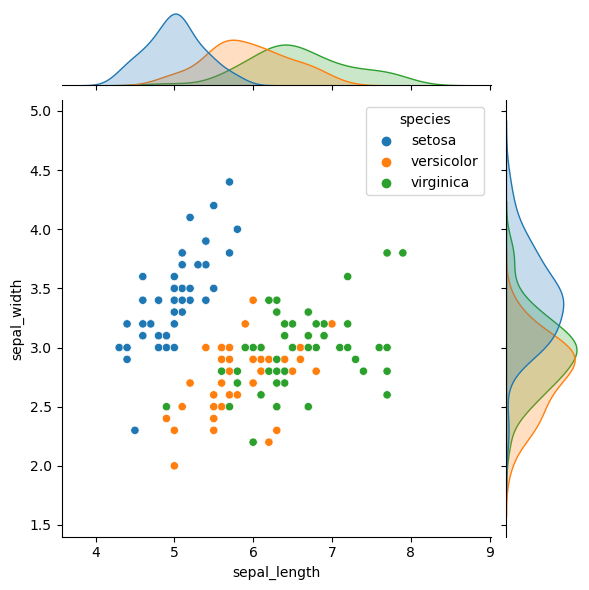

In [38]:
import seaborn as sns

sns.jointplot(data=df, x='sepal_length', y='sepal_width', hue='species')
